In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

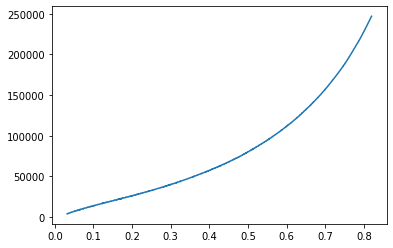

In [122]:

ethafoam = pd.read_csv('17_ethafoam_compression.csv', on_bad_lines='skip')
ethafoam_data = np.array(ethafoam)[5:,:].astype(float)

# linear region
ethafoam_data = ethafoam_data[ethafoam_data[:,1] > 0.8]  # remove initial setting data points
ethafoam_data = ethafoam_data[ethafoam_data[:,2] < 5e2]  # remove final data points

diameter = 50.75 / 1000 # m
ethafoam_thickness = 25 # mm
ethafoam_area = np.pi * (diameter/2)**2 # mm^2

ethafoam_strain = ethafoam_data[:,1] / ethafoam_thickness
ethafoam_stress = ethafoam_data[:,2] / ethafoam_area

plt.plot(ethafoam_strain, ethafoam_stress)



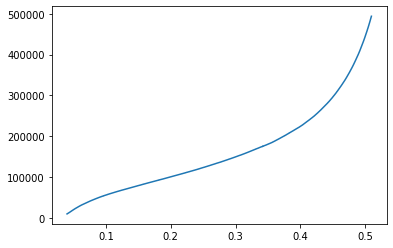

In [123]:

polystyrene_df = pd.read_csv('17_polystyrene_compression.csv', on_bad_lines='skip')
polystyrene_data = np.array(polystyrene_df)[5:,:].astype(float)

polystyrene_data = polystyrene_data[polystyrene_data[:,1] > 1] # remove initial setting data points
polystyrene_data = polystyrene_data[polystyrene_data[:,2] < 1e3] # remove final data points

diameter = 50.75 / 1000 # m
polystyrene_thickness = 25 # mm
polystyrene_area = np.pi * (diameter/2)**2 # mm^2

polystyrene_strain = polystyrene_data[:,1] / polystyrene_thickness
polystyrene_stress = polystyrene_data[:,2] / polystyrene_area

plt.plot(polystyrene_strain, polystyrene_stress)


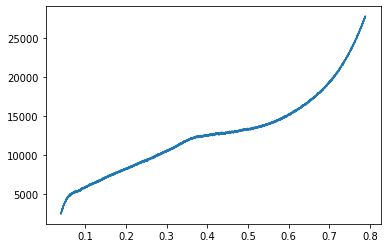

In [124]:

polyurethane_df = pd.read_csv('17_polyurethane_compression.csv', on_bad_lines='skip')
polyurethane_data = np.array(polyurethane_df)[12:,:].astype(float)

polyurethane_data = polyurethane_data[polyurethane_data[:,1] > 1] # remove initial data points
#polyurethane_data = polyurethane_data[polyurethane_data[:,2] < 1e4] # remove final data points

diameter = 50.75 / 1000 # m
polyurethane_thickness = 25 # mm
polyurethane_area = np.pi * (diameter/2)**2 # mm^2

polyurethane_strain = polyurethane_data[:,1] / polyurethane_thickness
polyurethane_stress = polyurethane_data[:,2] / polyurethane_area

plt.plot(polyurethane_strain, polyurethane_stress)


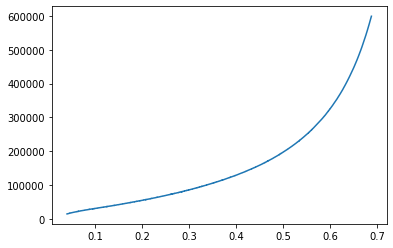

In [125]:

white_foam_df = pd.read_csv('17_white_foam_compression.csv', on_bad_lines='skip')
white_foam_data = np.array(white_foam_df)[12:,:].astype(float)

white_foam_data = white_foam_data[white_foam_data[:,1] > 1] # remove initial data points
white_foam_data = white_foam_data[white_foam_data[:,2] < 6e2] # remove final data points

white_foam_thickness = 25 # mm
white_foam_area = 0.001 # m^2

white_foam_strain = white_foam_data[:,1] / white_foam_thickness
white_foam_stress = white_foam_data[:,2] / white_foam_area

plt.plot(white_foam_strain, white_foam_stress)


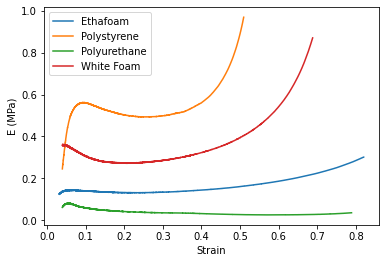

In [128]:
# E graph against strain
ethafoam_E = ethafoam_stress / ethafoam_strain * 1e-6
polystyrene_E = polystyrene_stress / polystyrene_strain * 1e-6
polyurethane_E = polyurethane_stress / polyurethane_strain * 1e-6
white_foam_E = white_foam_stress / white_foam_strain * 1e-6

plt.plot(ethafoam_strain, ethafoam_E, label='Ethafoam')
plt.plot(polystyrene_strain, polystyrene_E, label='Polystyrene')
plt.plot(polyurethane_strain, polyurethane_E, label='Polyurethane')
plt.plot(white_foam_strain, white_foam_E, label='White Foam')

# E graph against stress
plt.ylabel('E (MPa)')
plt.xlabel('Strain')

plt.legend()

plt.savefig('E_vs_strain.png', dpi=300)
plt.show()